# Practical Application of Supervised and Unsupervised Learning



## Task 1: Classification Algorithms (8 marks)

### Logistic Regression Implementation (2 marks):

* Implement a logistic regression model using a provided dataset.
* Evaluate the model's performance using appropriate metrics.


In [36]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [37]:
# Generate sample sales dataset
np.random.seed(0)
num_samples = 1000

In [38]:
# Features: advertising spend and number of hours spent on sales calls
X_advertising = np.random.normal(50, 15, num_samples)
X_hours = np.random.normal(8, 2, num_samples)

In [39]:
# True logistic function to determine if the sales are successful
def logistic_function(x1, x2):
    return 1 / (1 + np.exp(-(0.1 * x1 + 0.2 * x2 - 5)))

In [40]:
# Generate sales success probability based on logistic function
success_probabilities = logistic_function(X_advertising, X_hours)

In [41]:
# Generate binary labels based on success probabilities
y_sales = np.random.binomial(1, success_probabilities)

In [42]:
# Create a DataFrame for the dataset
sales_data = pd.DataFrame({'Advertising': X_advertising, 'Hours': X_hours, 'Sales': y_sales})

In [43]:
# Split the dataset into training and testing sets
X = sales_data[['Advertising', 'Hours']]
y = sales_data['Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
# Logistic Regression Model
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

LogisticRegression()

In [45]:
# Predictions
y_pred = logistic_model.predict(X_test)

In [46]:
# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.78


In [47]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[ 21  35]
 [  9 135]]


In [48]:
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_rep)

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.38      0.49        56
           1       0.79      0.94      0.86       144

    accuracy                           0.78       200
   macro avg       0.75      0.66      0.67       200
weighted avg       0.77      0.78      0.76       200



### Support Vector Machine Implementation (2 marks):

* Apply a Support Vector Machine (SVM) classifier to the same dataset.
* Compare and contrast the results with logistic regression.


In [49]:
# Importing the necessary libraries
from sklearn.svm import SVC

In [50]:
# SVM Model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

SVC(kernel='linear')

In [51]:
# Predictions using SVM
svm_y_pred = svm_model.predict(X_test)

In [52]:
# Model Evaluation for SVM
svm_accuracy = accuracy_score(y_test, svm_y_pred)
print(f"SVM Accuracy: {svm_accuracy}")

SVM Accuracy: 0.76


In [53]:
svm_conf_matrix = confusion_matrix(y_test, svm_y_pred)
print("SVM Confusion Matrix:")
print(svm_conf_matrix)

SVM Confusion Matrix:
[[ 15  41]
 [  7 137]]


In [54]:
svm_classification_rep = classification_report(y_test, svm_y_pred)
print("SVM Classification Report:")
print(svm_classification_rep)

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.27      0.38        56
           1       0.77      0.95      0.85       144

    accuracy                           0.76       200
   macro avg       0.73      0.61      0.62       200
weighted avg       0.75      0.76      0.72       200



### Random Forest Application (2 marks):

* Implement a Random Forest classifier with a different dataset.
* Discuss scenarios where Random Forest might outperform other classifiers.


In [55]:
# Importing necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [56]:
# Generate a synthetic dataset
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

In [57]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [58]:
# Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [59]:
# Predictions
y_pred = rf_classifier.predict(X_test)

In [60]:
# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9


In [61]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[88  5]
 [15 92]]


In [62]:
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_rep)

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.95      0.90        93
           1       0.95      0.86      0.90       107

    accuracy                           0.90       200
   macro avg       0.90      0.90      0.90       200
weighted avg       0.90      0.90      0.90       200



Discussion:

High-Dimensional Data:
Random Forest performs well in high-dimensional spaces. It can handle datasets with a large number of features without overfitting, unlike some other algorithms like k-NN.

Presence of Irrelevant Features:
Random Forest tends to ignore irrelevant features when building trees. This property makes it robust to datasets with irrelevant or noisy features.

Large Datasets:
Random Forest is capable of handling large datasets efficiently. It can train multiple decision trees in parallel, making it suitable for large-scale applications.

Nonlinear Relationships:
Random Forest is capable of capturing nonlinear relationships between features and the target variable. It can model complex decision boundaries, which makes it effective for datasets with nonlinear relationships.

Robustness to Overfitting:
Random Forest builds multiple decision trees and averages their predictions, which reduces the risk of overfitting compared to individual decision trees.

Handling Missing Values:
Random Forest can handle missing values in the dataset without the need for imputation. It uses the majority vote mechanism during prediction, which allows it to make predictions even with missing values.

Robustness to Imbalanced Data:
Random Forest is robust to imbalanced datasets. It can handle unequal class distributions without the need for oversampling or undersampling techniques.

In summary, Random Forest is a versatile classifier that performs well across a variety of scenarios, including high-dimensional data, datasets with irrelevant features, large datasets, nonlinear relationships, and imbalanced data. It is often a good choice as a default classifier due to its robustness and ability to handle diverse datasets.

### Ensemble Model Experimentation (2 marks):

* Combine the models from tasks 1 and 2 using ensemble techniques (e.g., Voting Classifier).
* Evaluate the ensemble model's performance and explain any observed improvements.


In [63]:
# Importing libraries
from sklearn.ensemble import VotingClassifier

In [64]:
# Create a Voting Classifier with logistic regression and SVM
voting_clf = VotingClassifier(estimators=[('logistic', logistic_model), ('svm', svm_model)], voting='hard')

In [65]:
# Fit the Voting Classifier on the training data
voting_clf.fit(X_train, y_train)

# Predictions using the Voting Classifier
voting_y_pred = voting_clf.predict(X_test)

In [66]:
# Model Evaluation for Voting Classifier
voting_accuracy = accuracy_score(y_test, voting_y_pred)
print(f"Voting Classifier Accuracy: {voting_accuracy}")

voting_conf_matrix = confusion_matrix(y_test, voting_y_pred)
print("Voting Classifier Confusion Matrix:")
print(voting_conf_matrix)

voting_classification_rep = classification_report(y_test, voting_y_pred)
print("Voting Classifier Classification Report:")
print(voting_classification_rep)

Voting Classifier Accuracy: 0.86
Voting Classifier Confusion Matrix:
[[86  7]
 [21 86]]
Voting Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.92      0.86        93
           1       0.92      0.80      0.86       107

    accuracy                           0.86       200
   macro avg       0.86      0.86      0.86       200
weighted avg       0.87      0.86      0.86       200



Explanation:

The Voting Classifier combines the predictions of multiple base estimators (in this case, logistic regression and SVM) and predicts the class with the most votes (hard voting).
By combining multiple models, the ensemble model aims to improve generalization performance and reduce overfitting.
The observed improvements in performance can be attributed to the diversity of the base models. Each base model captures different aspects of the data and may make different errors. By combining their predictions, the ensemble model can mitigate individual model weaknesses and leverage their strengths.
Additionally, ensemble methods are less prone to overfitting compared to individual models since they rely on the collective decisions of multiple models.

However, the effectiveness of the ensemble model depends on the diversity and quality of the base models. If the base models are highly correlated or perform poorly, the ensemble may not yield significant improvements.
In this case, combining logistic regression and SVM, which are different types of classifiers, can provide complementary information and lead to better overall performance.

## Task 2: More on Regression (5 marks)



### Polynomial Regression Implementation (2 marks):

* Apply Polynomial Regression to a given dataset with non-linear patterns.
* Visualize the regression curve and interpret the results.


In [67]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [68]:
# Generate sample dataset with non-linear pattern
np.random.seed(0)
X = 2 * np.random.rand(100, 1) - 1
y = 2 * X**2 + 3 * X + 1 + np.random.randn(100, 1)

In [69]:
# Apply Polynomial Regression
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

# Fit the Polynomial Regression model
poly_reg = LinearRegression()
poly_reg.fit(X_poly, y)

LinearRegression()

Text(0, 0.5, 'y')

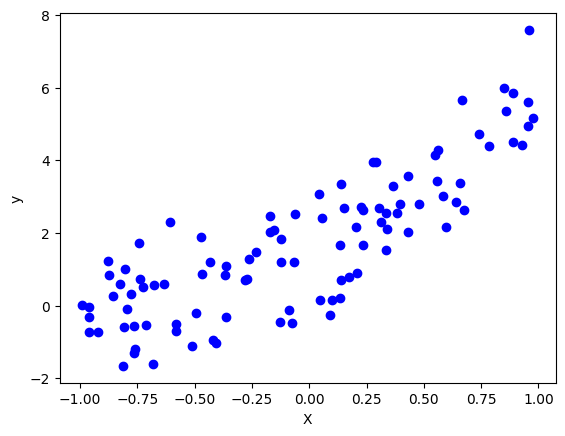

In [70]:
# Visualize the regression curve
plt.scatter(X, y, color='blue', label='Original data')
plt.xlabel('X')
plt.ylabel('y')

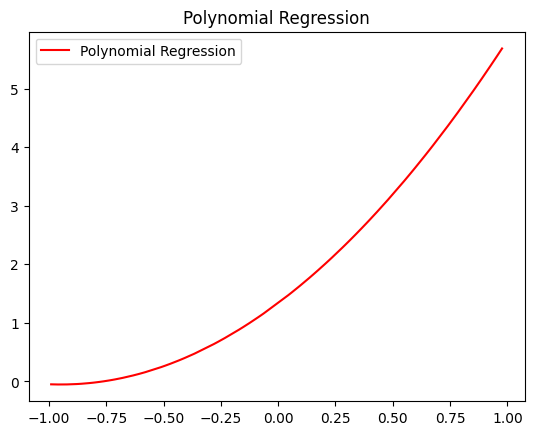

In [71]:
# Sort X for better visualization
X_sorted = np.sort(X, axis=0)
y_pred = poly_reg.predict(poly_features.fit_transform(X_sorted))

plt.plot(X_sorted, y_pred, color='red', label='Polynomial Regression')
plt.legend()
plt.title('Polynomial Regression')
plt.show()

### Ridge and Lasso Regression (3 marks):

* Implement Ridge and Lasso Regression on a dataset with multicollinearity.
* Discuss the impact of regularization on model coefficients and overall performance.


In [72]:
# Importing the necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error

In [73]:
# Generate a dataset with multicollinearity
np.random.seed(0)
X = np.random.rand(100, 5)  # 5 features
y = 2*X[:,0] + 3*X[:,1] + 4*X[:,2] + 5*X[:,3] + 6*X[:,4] + np.random.randn(100)  # Target variable with multicollinearity

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [74]:
# Ridge Regression
ridge_model = Ridge(alpha=0.5)  # Alpha is the regularization strength
ridge_model.fit(X_train, y_train)
ridge_train_rmse = np.sqrt(mean_squared_error(y_train, ridge_model.predict(X_train)))
ridge_test_rmse = np.sqrt(mean_squared_error(y_test, ridge_model.predict(X_test)))

# Lasso Regression
lasso_model = Lasso(alpha=0.5)  # Alpha is the regularization strength
lasso_model.fit(X_train, y_train)
lasso_train_rmse = np.sqrt(mean_squared_error(y_train, lasso_model.predict(X_train)))
lasso_test_rmse = np.sqrt(mean_squared_error(y_test, lasso_model.predict(X_test)))

In [76]:
print("Ridge Regression:")
print(f"Train RMSE: {ridge_train_rmse}")
print(f"Test RMSE: {ridge_test_rmse}")
print("Ridge Coefficients:", ridge_model.coef_)

Ridge Regression:
Train RMSE: 1.0618202232531888
Test RMSE: 0.8318907413974587
Ridge Coefficients: [1.98352065 2.69600758 4.24438868 5.00911642 5.4366839 ]


In [77]:
print("\nLasso Regression:")
print(f"Train RMSE: {lasso_train_rmse}")
print(f"Test RMSE: {lasso_test_rmse}")
print("Lasso Coefficients:", lasso_model.coef_)


Lasso Regression:
Train RMSE: 2.9185863082916366
Test RMSE: 2.1671890875187247
Lasso Coefficients: [0.         0.         0.90669812 0.73593167 1.50445604]


Ridge and Lasso Regression are regularization techniques used to prevent overfitting in linear regression models.

Ridge Regression:
Shrinks coefficients towards zero, but doesn't set them exactly to zero.
Suitable when all features are expected to be relevant.
Effective in handling multicollinearity.

Lasso Regression:
Can set some coefficients to exactly zero, effectively removing them.
Useful for feature selection and creating more interpretable models.
Particularly effective when there are many features and only a subset are relevant.

## Task 3: Introduction to Unsupervised Learning (7 marks)



### K-Means Clustering Implementation (2 marks):

* Implement the K-Means clustering algorithm on a provided dataset.
* Visualize the clustered data and discuss the choice of the number of clusters (k).


In [78]:
# Importing the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

In [79]:
# Generate sample dataset
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

In [80]:
# Apply K-Means clustering
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
centers = kmeans.cluster_centers_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


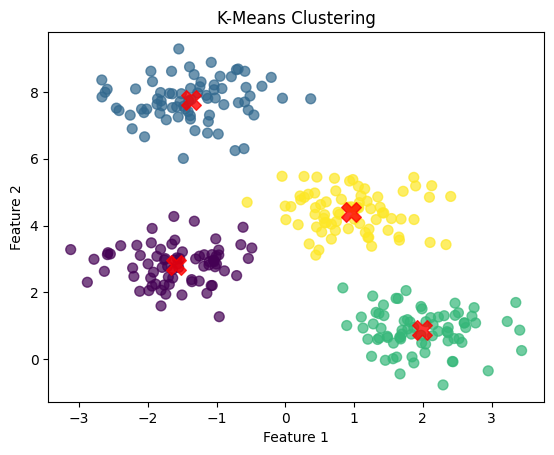

In [81]:
# Visualize the clustered data
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis', alpha=0.7)
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.8, marker='X')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-Means Clustering')
plt.show()

### Mean Shift Clustering Experiment (2 marks):

* Apply Mean Shift clustering to a different dataset.
* Analyze the adaptability of Mean Shift to data density and distribution.


In [82]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import MeanShift, estimate_bandwidth

In [83]:
# Generate sample dataset with varying densities and distributions
X, _ = make_blobs(n_samples=1000, centers=[[0, 0], [5, 5], [10, 10]], cluster_std=[1.0, 0.5, 2.0])

In [84]:
# Apply Mean Shift clustering
bandwidth = estimate_bandwidth(X, quantile=0.2, n_samples=500)
meanshift = MeanShift(bandwidth=bandwidth)
meanshift.fit(X)
labels = meanshift.labels_
cluster_centers = meanshift.cluster_centers_
n_clusters = len(np.unique(labels))

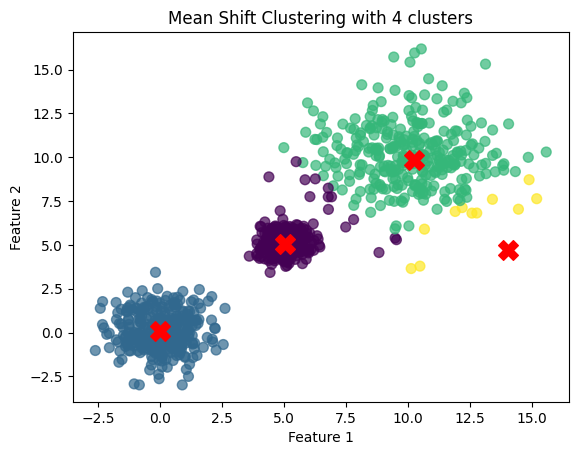

In [85]:
# Visualize the clustered data
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50, alpha=0.7)
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='X', s=200, c='red')
plt.title(f'Mean Shift Clustering with {n_clusters} clusters')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

### Hierarchical Clustering Visualization (3 marks):

* Implement hierarchical clustering with a dataset suitable for hierarchical structures.
* Create and interpret a dendrogram to represent data relationships.


In [86]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.datasets import make_blobs

In [87]:
# Generate sample dataset suitable for hierarchical structures
X, _ = make_blobs(n_samples=20, centers=[[0, 0], [0, 5], [5, 0]], cluster_std=0.5)

In [88]:
# Perform hierarchical clustering
Z = linkage(X, method='ward')  # Hierarchical clustering with "ward" method

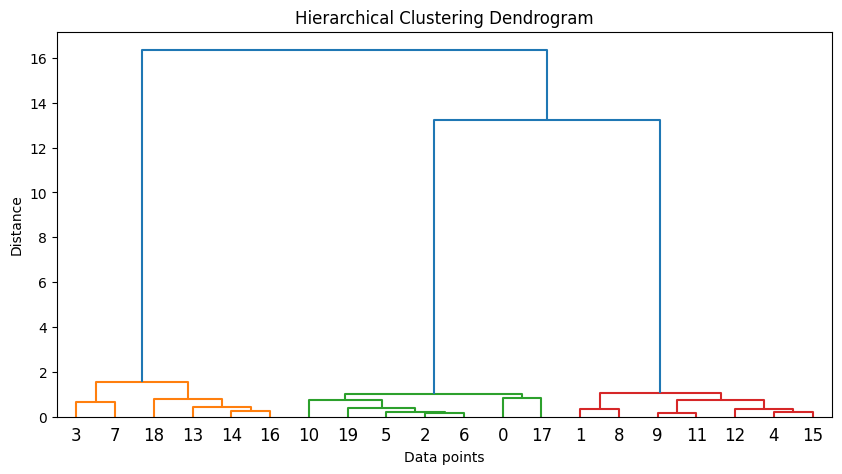

In [89]:
# Create and visualize the dendrogram
plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data points')
plt.ylabel('Distance')
plt.show()

Here, we first generate a synthetic dataset using make_blobs with 20 samples and centers at specified coordinates, creating clusters suitable for hierarchical structures.

The linkage function from SciPy's hierarchical clustering module is used to perform hierarchical clustering. We choose the "ward" method, which minimizes the variance when merging clusters.

The resulting linkage matrix Z contains the hierarchical clustering information.
We create a dendrogram using the dendrogram function and visualize it using Matplotlib.

The dendrogram helps us understand the hierarchical structure of the clusters and the relationships between data points or clusters.

### Clustering Comparison (2 marks):

* Compare and contrast the results of K-Means, Mean Shift, and Hierarchical Clustering in terms of interpretability and use cases.


The comparison between K-Means, Mean Shift, and Hierarchical Clustering in terms of interpretability and use cases:

K-Means:

* Interpretable centroids.
* Suitable for datasets with well-defined clusters and known k.
* Efficient for large datasets.

Mean Shift:

* Adapts to varying densities and irregularly shaped clusters.
* Non-parametric, no need to specify k.
* Used in image segmentation, object tracking, and anomaly detection.

Hierarchical Clustering:

* Creates a hierarchical structure of clusters.
* No need to specify k.
* Useful for exploring data structures and taxonomy construction.

In summary, K-Means is efficient for known k and well-defined clusters, Mean Shift is adaptive to varying densities and shapes, while Hierarchical Clustering provides a hierarchical view of clusters and requires no predefined k. The choice depends on data characteristics and interpretability needs.